In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
from sklearn.naive_bayes import CategoricalNB
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer, mean_absolute_error, mean_squared_error

In [5]:
def read_signals(filename):
    samples_count = 5000

    c = ['name', 'x', 'y']
    for i in range(0, samples_count):
        c.append(f'v{i}')
    c = c + ['cluster', 'p0', 'p1', 'p2', 'p3']

    df = pd.read_csv(filename, names=c, dtype=np.float32)
    df = df.set_index('name', drop=True)

    return df


In [6]:
def write_signals(df, filename):
    df.to_csv(filename, header=False)

In [7]:
if __name__ == "__main__":
    # Example
    df = read_signals('signals.csv')
    print(df)
    write_signals(df, 'signals-out.csv')

                 x            y     v0     v1     v2     v3     v4     v5  \
name                                                                        
168.0  3642.316895  -107.175003  0.558  0.595  0.519  0.742  0.664  0.467   
307.0  4034.298096  -668.197998  0.650  0.457  0.572  0.644  0.581  0.525   
668.0  4358.000977  1703.198975  0.638  0.621  0.646  0.495  0.510  0.611   
229.0  2786.060059    75.125000  0.917  0.917  0.916  0.912  0.908  0.905   
316.0   988.637024  -492.056000  0.359  0.364  0.379  0.396  0.404  0.405   
...            ...          ...    ...    ...    ...    ...    ...    ...   
498.0  2648.039062 -1611.817993  0.633  0.550  0.548  0.531  0.621  0.565   
575.0  1763.933960    67.286003  0.842  0.852  0.859  0.865  0.870  0.877   
430.0  2138.580078  1029.394043  0.777  0.789  0.800  0.808  0.817  0.824   
722.0  4078.672119   971.900024  0.405  0.475  0.503  0.370  0.472  0.481   
710.0  1856.171021  2998.179932  0.895  0.895  0.894  0.894  0.893  0.892   

In [8]:
df

,x,y,v0,v1,v2,v3,v4,v5,v6,v7,...,v4995,v4996,v4997,v4998,v4999,cluster,p0,p1,p2,p3
name,,,,,,,,,,,,,,,,,,,,,
168.0,3642.316895,-107.175003,0.558,0.595,0.519,0.742,0.664,0.467,0.426,0.448,...,0.606,0.523,0.607,0.629,0.664,-1.0,-1.0,-1.0,-1.0,-1.0
307.0,4034.298096,-668.197998,0.650,0.457,0.572,0.644,0.581,0.525,0.645,0.515,...,0.397,0.579,0.636,0.570,0.530,-1.0,-1.0,-1.0,-1.0,-1.0
668.0,4358.000977,1703.198975,0.638,0.621,0.646,0.495,0.510,0.611,0.574,0.601,...,0.569,0.587,0.541,0.412,0.519,-1.0,-1.0,-1.0,-1.0,-1.0
229.0,2786.060059,75.125000,0.917,0.917,0.916,0.912,0.908,0.905,0.904,0.904,...,0.943,0.943,0.943,0.943,0.943,-1.0,-1.0,-1.0,-1.0,-1.0
316.0,988.637024,-492.056000,0.359,0.364,0.379,0.396,0.404,0.405,0.392,0.371,...,0.626,0.606,0.629,0.674,0.727,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498.0,2648.039062,-1611.817993,0.633,0.550,0.548,0.531,0.621,0.565,0.628,0.466,...,0.515,0.642,0.373,0.517,0.520,-1.0,-1.0,-1.0,-1.0,-1.0
575.0,1763.933960,67.286003,0.842,0.852,0.859,0.865,0.870,0.877,0.876,0.878,...,0.990,0.985,0.985,0.986,0.986,-1.0,-1.0,-1.0,-1.0,-1.0
430.0,2138.580078,1029.394043,0.777,0.789,0.800,0.808,0.817,0.824,0.831,0.836,...,0.993,0.994,0.995,0.993,0.990,-1.0,-1.0,-1.0,-1.0,-1.0


In [9]:
df['cluster'].unique()

array([-1.,  6.,  8.,  5.,  1.,  7.,  0.,  3.,  4.,  2.], dtype=float32)

In [10]:
dftrain=df.loc[df['cluster'] != -1]

In [11]:
dfpredict=df

In [12]:
dftrain

,x,y,v0,v1,v2,v3,v4,v5,v6,v7,...,v4995,v4996,v4997,v4998,v4999,cluster,p0,p1,p2,p3
name,,,,,,,,,,,,,,,,,,,,,
730.0,1011.065979,1100.473022,0.570,0.575,0.575,0.571,0.565,0.575,0.579,0.574,...,0.855,0.855,0.835,0.812,0.799,6.0,-1.0,1750.0,-1.0,-1.0
673.0,2520.621094,-1655.088989,0.662,0.582,0.589,0.637,0.443,0.718,0.524,0.599,...,0.500,0.508,0.535,0.538,0.408,8.0,0.0,-1.0,-1.0,-1.0
520.0,2251.706055,3314.560059,0.389,0.407,0.413,0.417,0.418,0.418,0.416,0.413,...,0.996,0.998,0.999,1.000,0.998,5.0,2222.0,-1.0,-1.0,-1.0
609.0,3748.843018,730.304993,0.756,0.765,0.781,0.793,0.804,0.811,0.819,0.833,...,0.947,0.948,0.951,0.955,0.954,1.0,1528.0,-1.0,4358.0,-1.0
419.0,4385.807129,1247.943970,0.498,0.566,0.520,0.458,0.555,0.795,0.546,0.496,...,0.529,0.550,0.626,0.550,0.584,7.0,-1.0,2414.0,-1.0,4999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70.0,3980.073975,2893.510010,0.361,0.410,0.460,0.505,0.549,0.581,0.606,0.628,...,0.998,0.999,0.999,1.000,1.000,3.0,891.0,1358.0,-1.0,-1.0
665.0,1231.561035,4289.522949,0.599,0.691,0.713,0.716,0.714,0.710,0.708,0.710,...,0.884,0.875,0.863,0.846,0.821,5.0,-1.0,-1.0,-1.0,4303.0
471.0,2241.639893,1116.144043,0.664,0.664,0.668,0.669,0.674,0.679,0.686,0.695,...,0.949,0.950,0.950,0.950,0.951,1.0,-1.0,242.0,-1.0,-1.0


In [13]:
dftrain.sort_values(by ='name')
dfpredict.sort_values(by ='name')

,x,y,v0,v1,v2,v3,v4,v5,v6,v7,...,v4995,v4996,v4997,v4998,v4999,cluster,p0,p1,p2,p3
name,,,,,,,,,,,,,,,,,,,,,
0.0,2045.811035,2176.302979,0.833,0.844,0.852,0.860,0.866,0.874,0.880,0.883,...,0.951,0.955,0.953,0.953,0.957,0.0,-1.0,-1.0,3337.0,-1.0
1.0,121.735001,1739.412964,0.992,0.995,0.997,1.000,1.000,0.994,0.990,0.991,...,0.651,0.642,0.638,0.628,0.618,-1.0,-1.0,-1.0,-1.0,-1.0
2.0,2140.093018,1440.786987,0.787,0.787,0.787,0.787,0.787,0.787,0.787,0.787,...,0.873,0.873,0.873,0.873,0.873,1.0,62.0,191.0,-1.0,-1.0
3.0,1945.437012,1039.363037,0.720,0.725,0.730,0.735,0.741,0.748,0.749,0.751,...,0.998,1.000,1.000,1.000,0.999,-1.0,-1.0,-1.0,-1.0,-1.0
4.0,1549.837036,46.582001,0.470,0.484,0.483,0.471,0.456,0.449,0.441,0.432,...,0.549,0.554,0.556,0.559,0.570,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755.0,248.067001,2375.016113,0.998,0.998,0.999,0.999,0.999,0.999,0.999,0.999,...,0.971,0.971,0.971,0.970,0.970,-1.0,-1.0,-1.0,-1.0,-1.0
756.0,1336.741943,4033.645996,0.411,0.413,0.409,0.402,0.405,0.412,0.415,0.411,...,0.996,0.997,0.998,0.999,1.000,-1.0,-1.0,-1.0,-1.0,-1.0
757.0,3431.371094,3125.198975,0.535,0.535,0.535,0.535,0.535,0.535,0.535,0.535,...,0.924,0.924,0.924,0.924,0.924,-1.0,-1.0,-1.0,-1.0,-1.0


In [14]:
X=dftrain.drop(columns=['cluster','p0','p1','p2','p3'])

In [15]:
y=dftrain['cluster']

In [16]:
Xpred=dfpredict.drop(columns=['cluster','p0','p1','p2','p3'])

In [17]:
ypred=dfpredict['cluster']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## KNEIGHBOUR

In [19]:
Kmodel=KNeighborsClassifier(n_neighbors=5)

In [20]:
Kmodel.fit(X,y)

KNeighborsClassifier()

In [21]:
print("Результат для обычных данных")
print(Kmodel.score(X,y))

Результат для обычных данных
0.8899082568807339


C:\Users\Александр\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [22]:
kpredict=Kmodel.predict(Xpred)

C:\Users\Александр\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [23]:
dfpredict['kpredict']=kpredict

## SVM

In [24]:
svm=SVC(C=50, kernel="rbf")

In [25]:
svm.fit(X,y)

SVC(C=50)

In [26]:
print("Результат для обычных данных")
print(svm.score(X,y))

Результат для обычных данных
0.944954128440367


In [27]:
svmpredict=svm.predict(Xpred)

In [28]:
dfpredict['svmpredict']=svmpredict

## FOREST

In [29]:
randomforest=RandomForestClassifier()

In [30]:
randomforest.fit(X,y)

RandomForestClassifier()

In [31]:
print("Результат для обычных данных")
print(randomforest.score(X,y))

Результат для обычных данных
1.0


In [32]:
predictforest=randomforest.predict(Xpred)

In [33]:
dfpredict['predforest']=predictforest

## CATBOOST

In [34]:
cb=CatBoostClassifier(task_type='GPU')

In [35]:
cb.fit(X,y)

Learning rate set to 0.041297
0:	learn: 2.1399396	total: 168ms	remaining: 2m 47s
1:	learn: 2.0833799	total: 323ms	remaining: 2m 41s
2:	learn: 2.0497390	total: 474ms	remaining: 2m 37s
3:	learn: 2.0113520	total: 639ms	remaining: 2m 38s
4:	learn: 1.9616747	total: 785ms	remaining: 2m 36s
5:	learn: 1.9114747	total: 924ms	remaining: 2m 33s
6:	learn: 1.8626030	total: 1.06s	remaining: 2m 30s
7:	learn: 1.8257080	total: 1.22s	remaining: 2m 30s
8:	learn: 1.7869753	total: 1.37s	remaining: 2m 31s
9:	learn: 1.7576700	total: 1.53s	remaining: 2m 31s
10:	learn: 1.7226368	total: 1.68s	remaining: 2m 31s
11:	learn: 1.6858137	total: 1.85s	remaining: 2m 32s
12:	learn: 1.6467789	total: 1.99s	remaining: 2m 31s
13:	learn: 1.6187249	total: 2.16s	remaining: 2m 31s
14:	learn: 1.5970941	total: 2.33s	remaining: 2m 33s
15:	learn: 1.5592847	total: 2.48s	remaining: 2m 32s
16:	learn: 1.5325939	total: 2.63s	remaining: 2m 32s
17:	learn: 1.4957231	total: 2.78s	remaining: 2m 31s
18:	learn: 1.4635483	total: 2.93s	remaining:

In [36]:
print("Результат для обычных данных")
print(cb.score(X,y))


Результат для обычных данных
1.0


In [37]:
cbpredict=cb.predict(Xpred)

In [38]:
dfpredict['cbpredict']=cbpredict

## GAUSSIAN Bayes

In [39]:
gnb=GaussianNB()

In [40]:
gnbpred=gnb.fit(X,y).predict(Xpred)

In [41]:
dfpredict['gnbpredict']=gnbpred

In [42]:
dfpredict

,x,y,v0,v1,v2,v3,v4,v5,v6,v7,...,cluster,p0,p1,p2,p3,kpredict,svmpredict,predforest,cbpredict,gnbpredict
name,,,,,,,,,,,,,,,,,,,,,
168.0,3642.316895,-107.175003,0.558,0.595,0.519,0.742,0.664,0.467,0.426,0.448,...,-1.0,-1.0,-1.0,-1.0,-1.0,7.0,7.0,7.0,7.0,7.0
307.0,4034.298096,-668.197998,0.650,0.457,0.572,0.644,0.581,0.525,0.645,0.515,...,-1.0,-1.0,-1.0,-1.0,-1.0,7.0,7.0,7.0,7.0,7.0
668.0,4358.000977,1703.198975,0.638,0.621,0.646,0.495,0.510,0.611,0.574,0.601,...,-1.0,-1.0,-1.0,-1.0,-1.0,7.0,7.0,7.0,7.0,7.0
229.0,2786.060059,75.125000,0.917,0.917,0.916,0.912,0.908,0.905,0.904,0.904,...,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,0.0,5.0,1.0,0.0
316.0,988.637024,-492.056000,0.359,0.364,0.379,0.396,0.404,0.405,0.392,0.371,...,-1.0,-1.0,-1.0,-1.0,-1.0,6.0,6.0,6.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498.0,2648.039062,-1611.817993,0.633,0.550,0.548,0.531,0.621,0.565,0.628,0.466,...,-1.0,-1.0,-1.0,-1.0,-1.0,8.0,8.0,8.0,8.0,8.0
575.0,1763.933960,67.286003,0.842,0.852,0.859,0.865,0.870,0.877,0.876,0.878,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,2.0,0.0,0.0,1.0
430.0,2138.580078,1029.394043,0.777,0.789,0.800,0.808,0.817,0.824,0.831,0.836,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,5.0,5.0,2.0


## КУЧА СТРАННЫХ КЛАССИФИКАТОРОВ

In [43]:
GausNB=GaussianNB()
GausProc=GaussianProcessClassifier()
AdaBoost=AdaBoostClassifier()

In [44]:
GausNBpred=GausNB.fit(X,y).predict(Xpred)
GausProcpred=GausProc.fit(X,y).predict(Xpred)
AdaBoostpred=AdaBoost.fit(X,y).predict(Xpred)

C:\Users\Александр\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [45]:
dfpredict['GausNBpred']=GausNBpred
dfpredict['GausProcpred']=GausProcpred
dfpredict['AdaBoostpred']=AdaBoostpred

## MLPC

In [46]:
parametr={'alpha':[0.0001,0.001,0.01,0.1,1,5,10]}

In [47]:
mlpc=MLPClassifier(
    hidden_layer_sizes=100,
    activation='logistic',
    solver='sgd',
    learning_rate='adaptive',
    learning_rate_init=0.0001,
    max_iter=1000
    )

In [48]:
MLPCpred=GridSearchCV(mlpc, parametr).fit(X,y)

C:\Users\Александр\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Александр\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Александр\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Александр\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reac

In [49]:
MLPCpred.best_estimator_

MLPClassifier(activation='logistic', alpha=0.001, hidden_layer_sizes=100,
              learning_rate='adaptive', learning_rate_init=0.0001,
              max_iter=1000, solver='sgd')

In [50]:
dfpredict['MlPCpred']=MLPCpred.predict(Xpred)

predclass0=dfpredict.loc[dfpredict['cluster'] == 0]
predclass1=dfpredict.loc[dfpredict['cluster'] == 1]
predclass2=dfpredict.loc[dfpredict['cluster'] == 2]
predclass3=dfpredict.loc[dfpredict['cluster'] == 3]
predclass4=dfpredict.loc[dfpredict['cluster'] == 4]
predclass5=dfpredict.loc[dfpredict['cluster'] == 5]
predclass6=dfpredict.loc[dfpredict['cluster'] == 6]
predclass7=dfpredict.loc[dfpredict['cluster'] == 7]
predclass8=dfpredict.loc[dfpredict['cluster'] == 8]


predclass0

class0=dftrain.loc[df['cluster'] == 0]
class1=dftrain.loc[df['cluster'] == 1]
class2=dftrain.loc[df['cluster'] == 2]
class3=dftrain.loc[df['cluster'] == 3]
class4=dftrain.loc[df['cluster'] == 4]
class5=dftrain.loc[df['cluster'] == 5]
class6=dftrain.loc[df['cluster'] == 6]
class7=dftrain.loc[df['cluster'] == 7]
class8=dftrain.loc[df['cluster'] == 8]
noclass=df.loc[df['cluster'] == -1]

class1.sort_index()

class1.items()

plt.figure(figsize=(10, 5))
plt.style.use('seaborn')
fig, ax = plt.subplots(6)
plt.plot(df[df.cluster == 1][df.columns[2:-5]].T, ax=ax)


fig,ax=plt.subplots(6,figsize=(15,30)) 

for i, row in class1.iterrows():
    k=0
    sns.lineplot(dftrain[dftrain.index == i][dftrain.columns[2:-5]].T, ax=ax[k])
    k+=1

sns.lineplot(dftrain[dftrain.index == 0][dftrain.columns[2:-5]].T)

plt.plot(df[df.cluster == 1][df.columns[2:-5]].T)

plt.figure(figsize=(15, 15))
sns.scatterplot(predclass0['x'],predclass0['y'])
sns.scatterplot(predclass1['x'],predclass1['y'])
sns.scatterplot(predclass2['x'],predclass2['y'])
sns.scatterplot(predclass3['x'],predclass3['y'])
sns.scatterplot(predclass4['x'],predclass4['y'])
sns.scatterplot(predclass5['x'],predclass5['y'])
sns.scatterplot(predclass6['x'],predclass6['y'])
sns.scatterplot(predclass7['x'],predclass7['y'])
sns.scatterplot(predclass8['x'],predclass8['y'])


In [51]:
Kpredclust=dfpredict.groupby('kpredict')
Svmclust=dfpredict.groupby('svmpredict')
Forestclust=dfpredict.groupby('predforest')
Cbclust=dfpredict.groupby('cbpredict')
Gnbclust=dfpredict.groupby('gnbpredict')

In [52]:
GausNBpredclust=dfpredict.groupby('GausNBpred')
GausProcpredclust=dfpredict.groupby('GausProcpred')
AdaBoostpredclust=dfpredict.groupby('AdaBoostpred')
MlPCpredclust=dfpredict.groupby('MlPCpred')

Text(0.5, 1.0, 'Kneigbours, предсказанные')

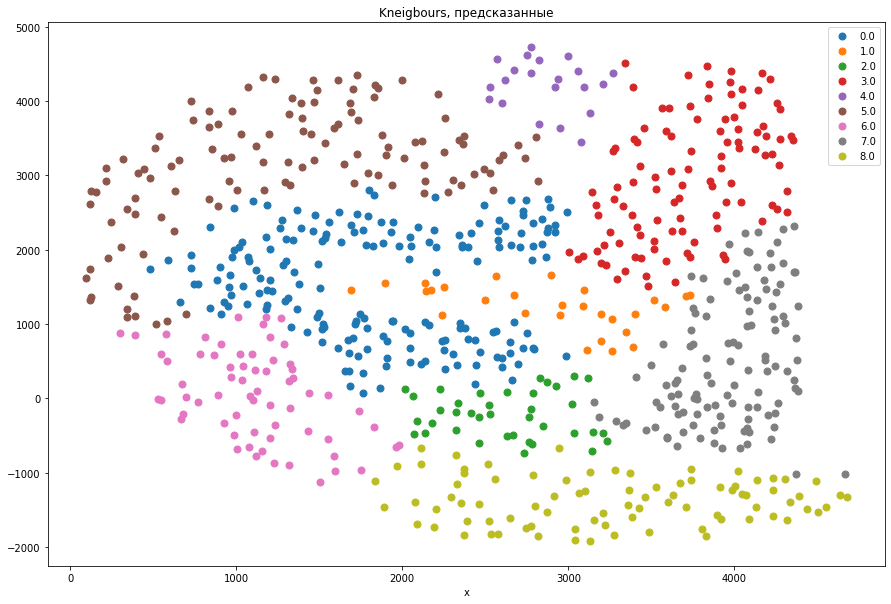

In [53]:
fig,ax=plt.subplots(figsize=(15,10))
plt.style.use('default')
Kpredclust.plot(x='x',y='y', style='.', ax=ax, markersize=14.0)
#trainclust.plot(x='x',y='y', style='*', ax=ax, markersize=20.0)
ax.legend(Kpredclust.groups.keys())
ax.set_title('Kneigbours, предсказанные')

Text(0.5, 1.0, 'SVM, предсказанные')

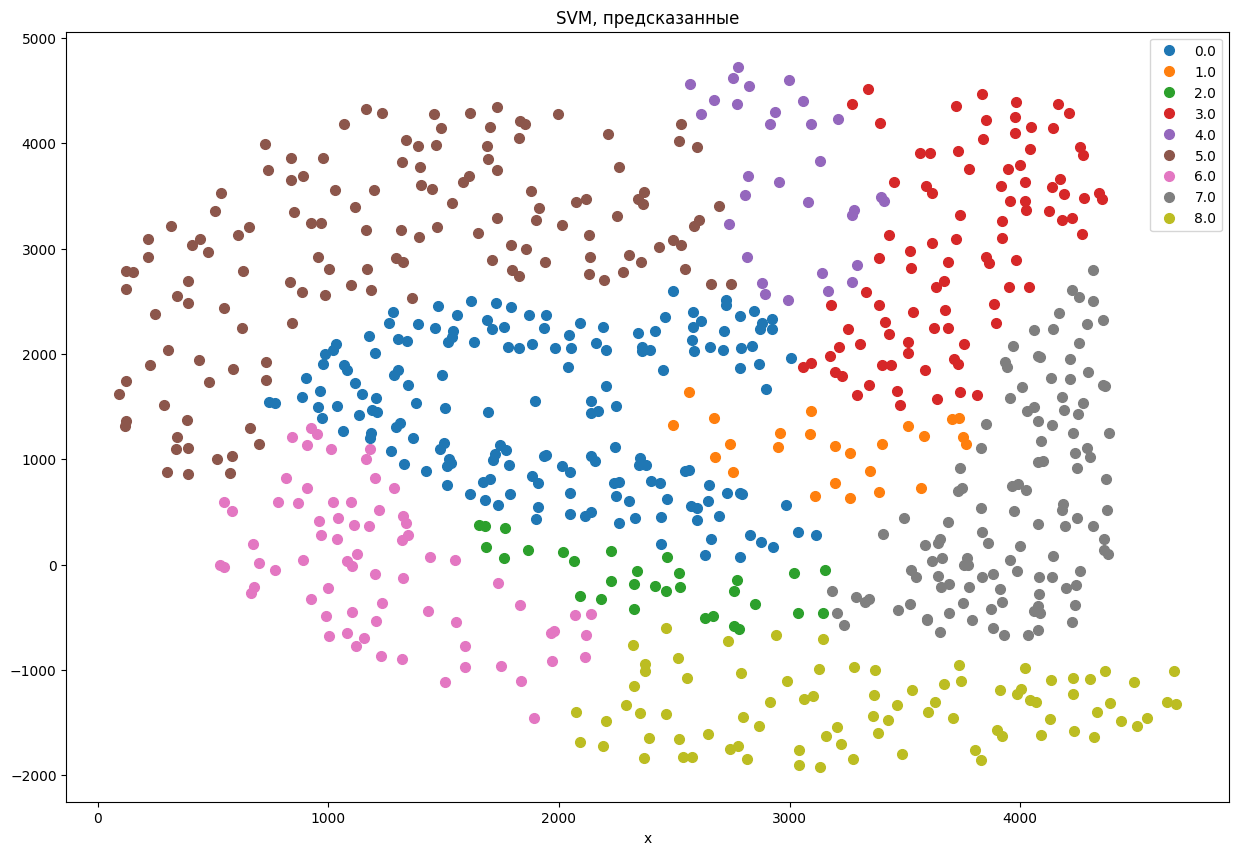

In [54]:
fig,ax=plt.subplots(figsize=(15,10))
 
Svmclust.plot(x='x',y='y', style='.', ax=ax, markersize=14.0)
ax.legend(Svmclust.groups.keys())
ax.set_title('SVM, предсказанные')

Text(0.5, 1.0, 'RandomForest, предсказанные')

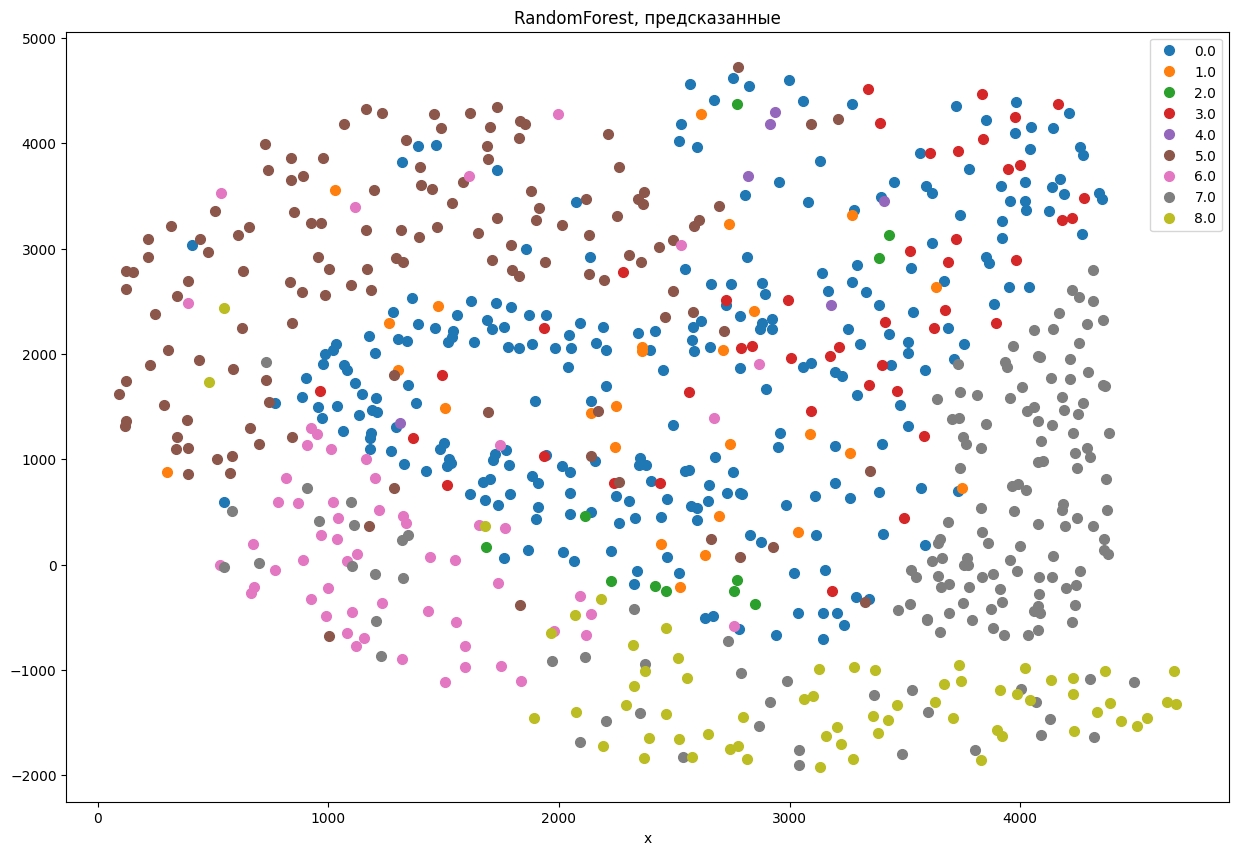

In [55]:
fig,ax=plt.subplots(figsize=(15,10))
 
Forestclust.plot(x='x',y='y', style='.', ax=ax, markersize=14.0)
ax.legend(Forestclust.groups.keys())
ax.set_title('RandomForest, предсказанные')

Text(0.5, 1.0, 'CatBoost, предсказанные')

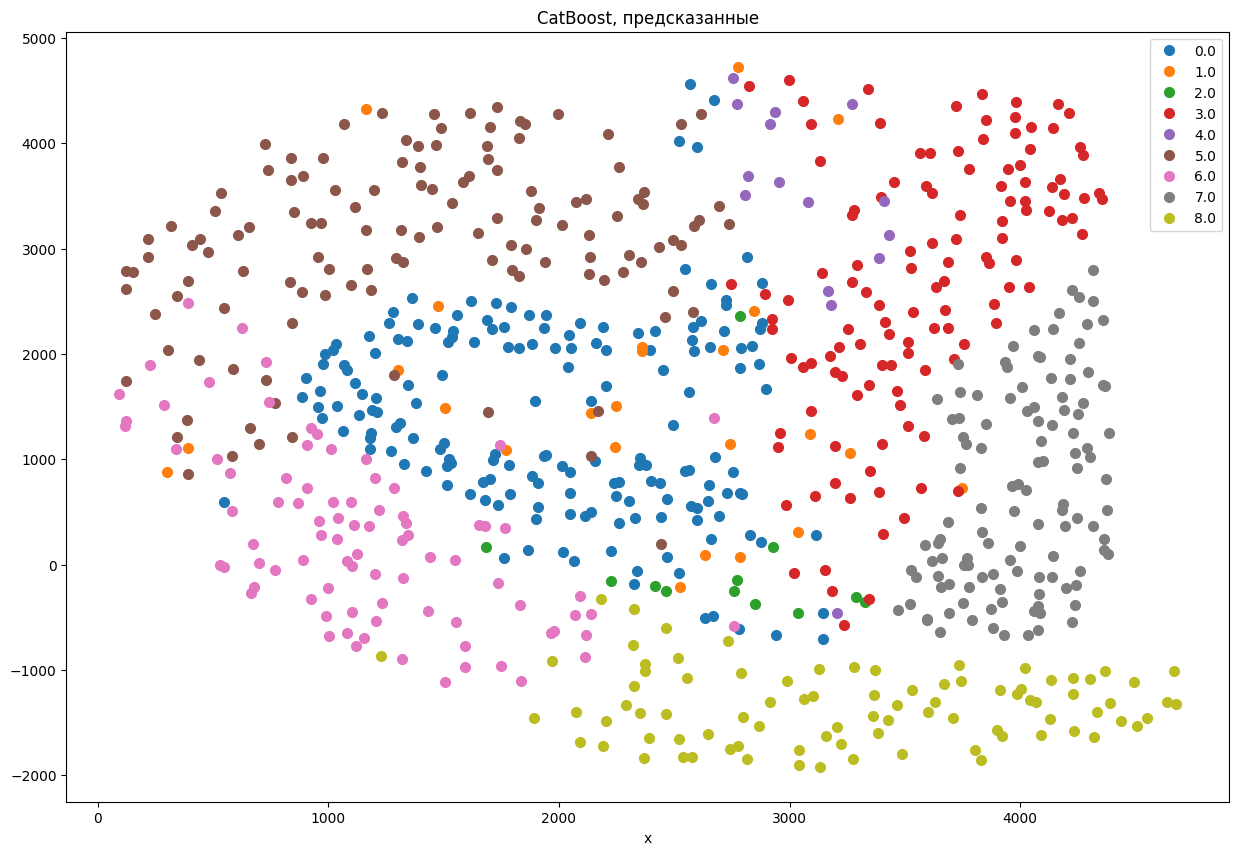

In [56]:
fig,ax=plt.subplots(figsize=(15,10))
 
Cbclust.plot(x='x',y='y', style='.', ax=ax, markersize=14.0)
ax.legend(Cbclust.groups.keys())
ax.set_title('CatBoost, предсказанные')

Text(0.5, 1.0, 'Gaussian Naive Bayes, предсказанные')

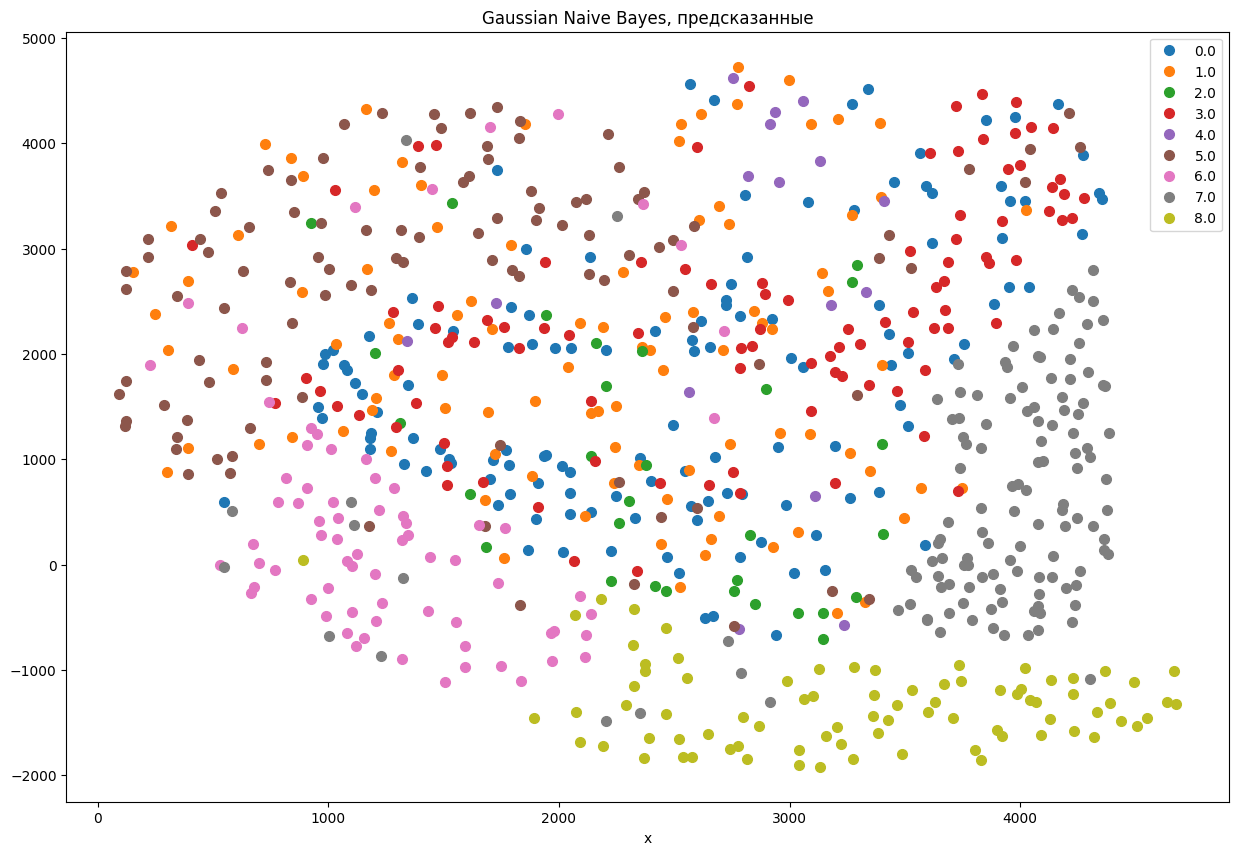

In [57]:
fig,ax=plt.subplots(figsize=(15,10))
plt.style.use('default')
Gnbclust.plot(x='x',y='y', style='.', ax=ax, markersize=14.0)
ax.legend(Gnbclust.groups.keys())
ax.set_title('Gaussian Naive Bayes, предсказанные')

Text(0.5, 1.0, 'GausNB, предсказанные')

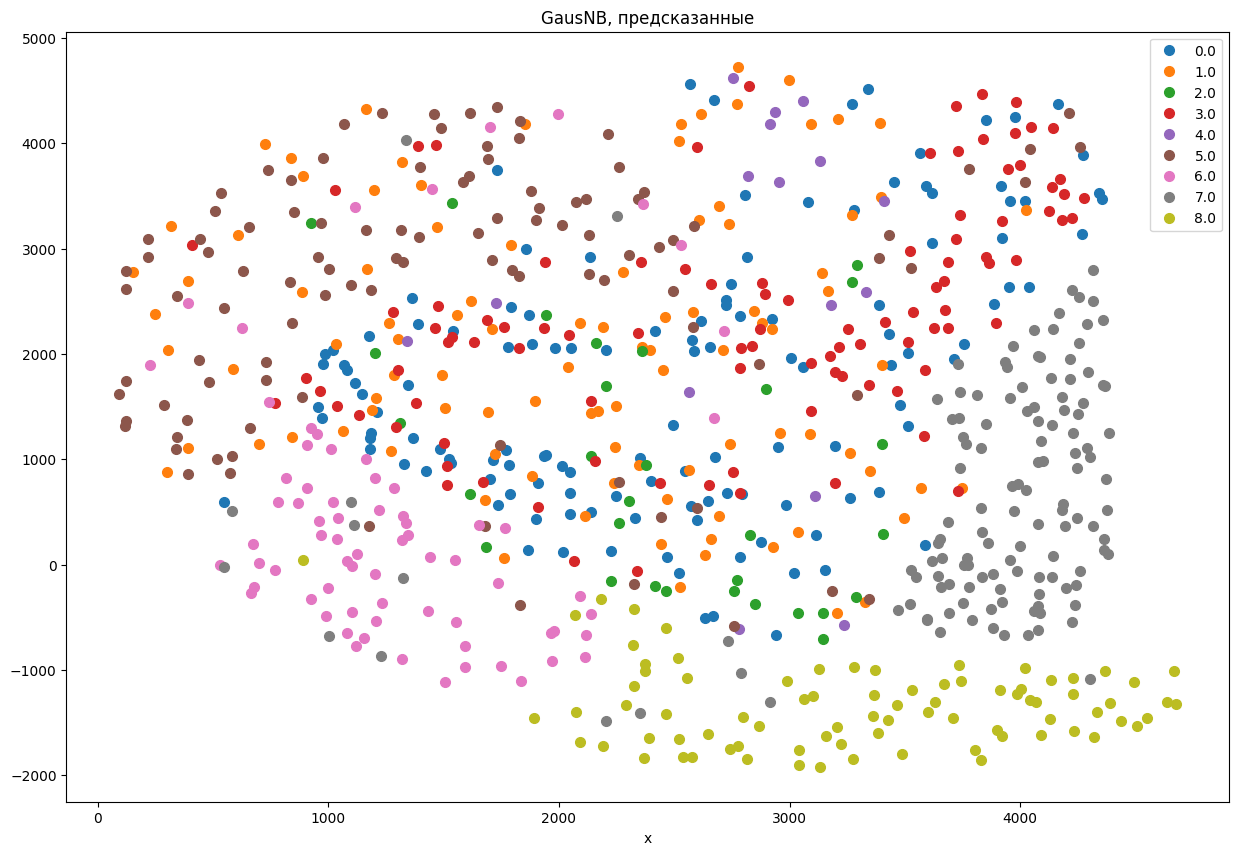

In [58]:
fig,ax=plt.subplots(figsize=(15,10))
plt.style.use('default')
GausNBpredclust.plot(x='x',y='y', style='.', ax=ax, markersize=14.0)
ax.legend(GausNBpredclust.groups.keys())
ax.set_title('GausNB, предсказанные')

Text(0.5, 1.0, 'GausProc, предсказанные')

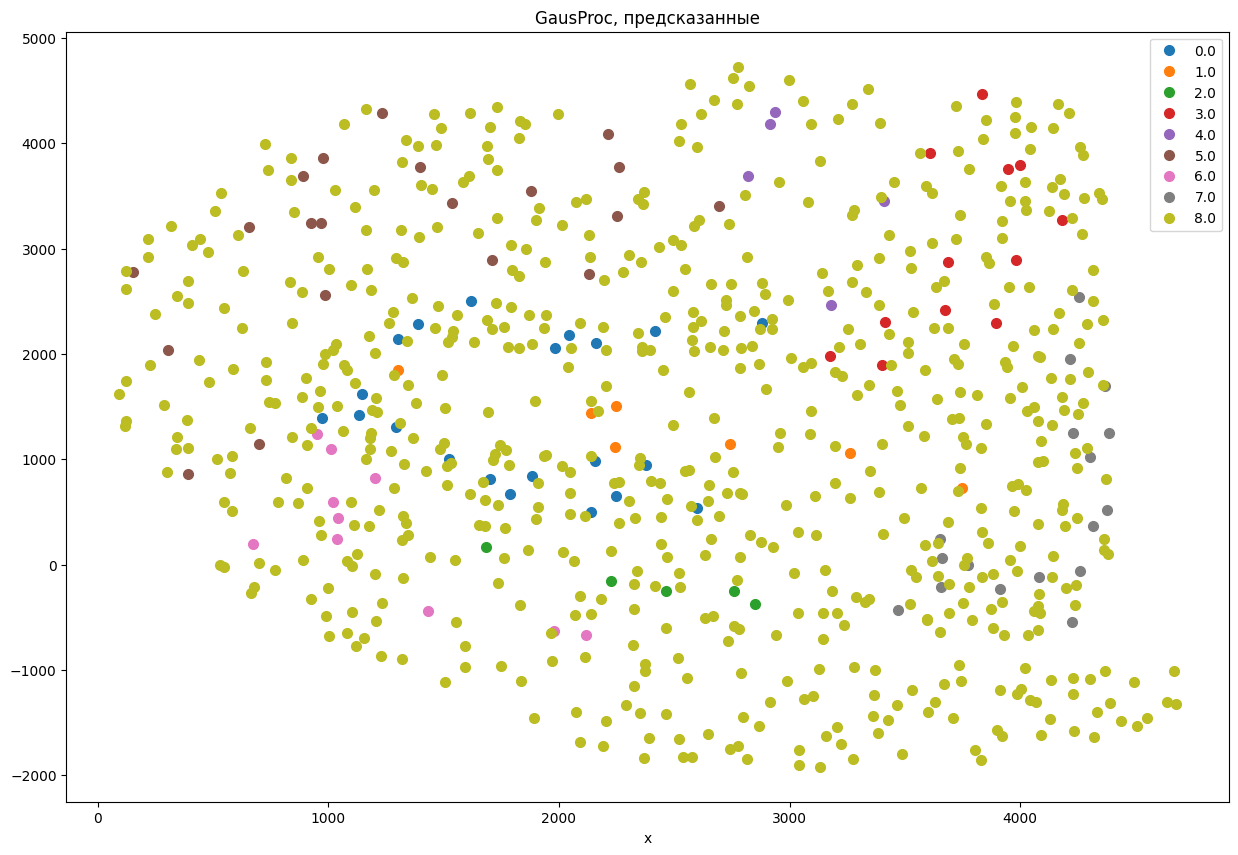

In [59]:
fig,ax=plt.subplots(figsize=(15,10))
plt.style.use('default')
GausProcpredclust.plot(x='x',y='y', style='.', ax=ax, markersize=14.0)
ax.legend(GausProcpredclust.groups.keys())
ax.set_title('GausProc, предсказанные')

Text(0.5, 1.0, 'AdaBoost, предсказанные')

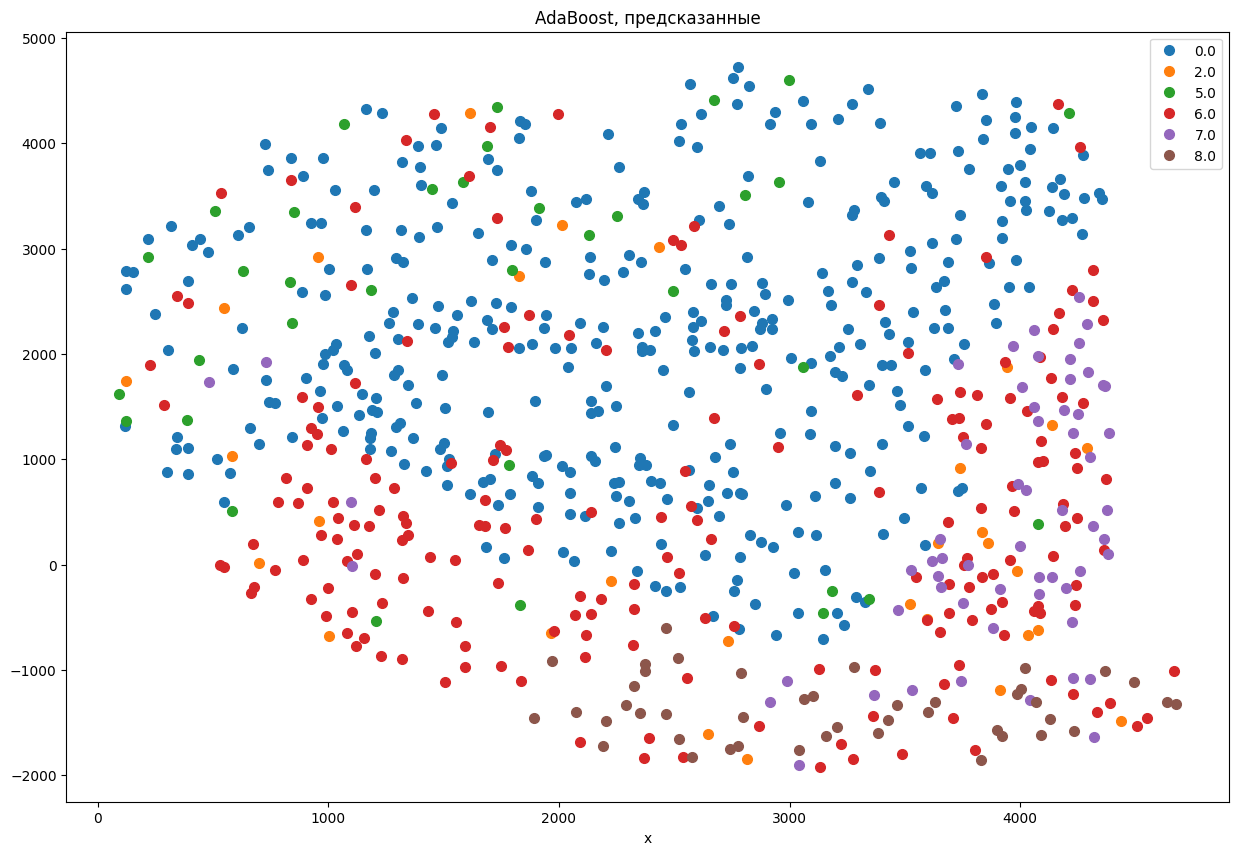

In [60]:
fig,ax=plt.subplots(figsize=(15,10))
plt.style.use('default')
AdaBoostpredclust.plot(x='x',y='y', style='.', ax=ax, markersize=14.0)
ax.legend(AdaBoostpredclust.groups.keys())
ax.set_title('AdaBoost, предсказанные')

Text(0.5, 1.0, 'MLPC, предсказанные')

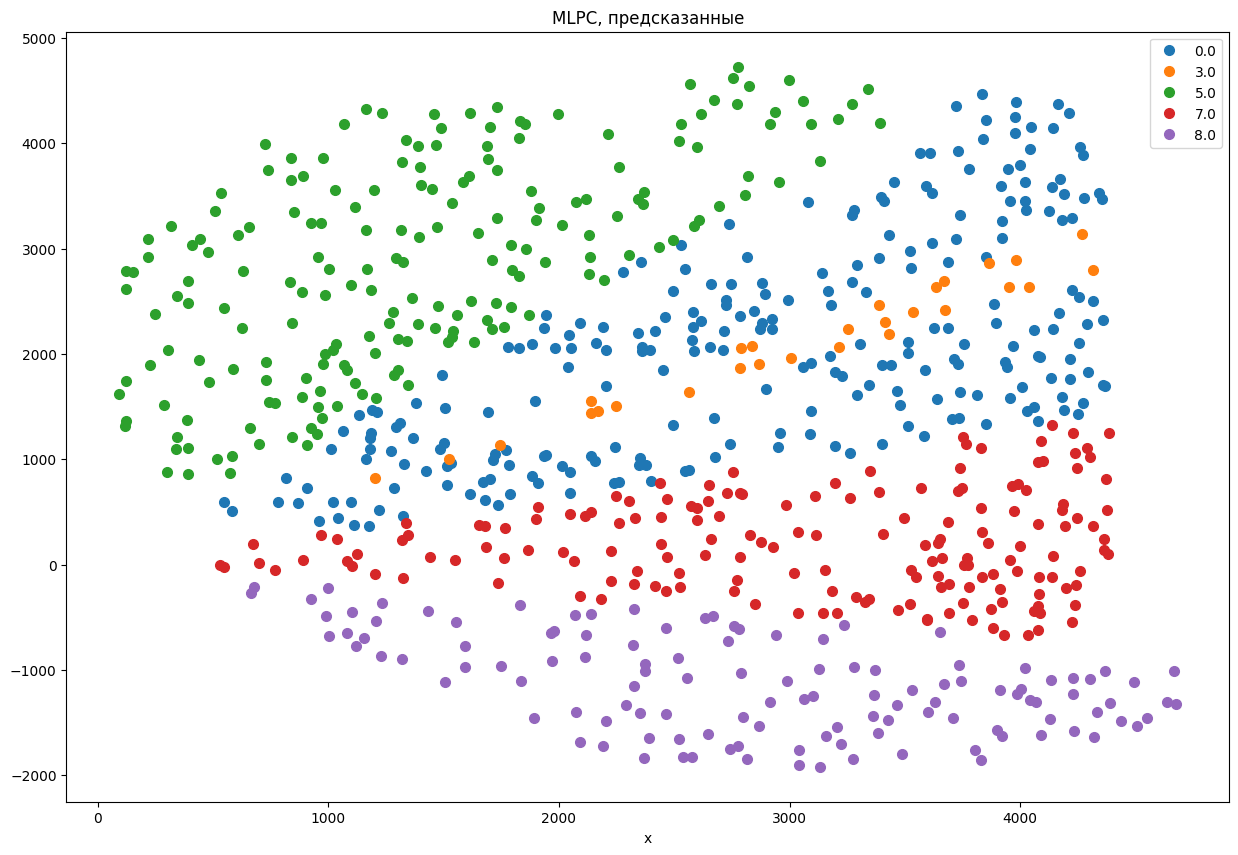

In [61]:
fig,ax=plt.subplots(figsize=(15,10))
plt.style.use('default')
MlPCpredclust.plot(x='x',y='y', style='.', ax=ax, markersize=14.0)
ax.legend(MlPCpredclust.groups.keys())
ax.set_title('MLPC, предсказанные')